## This analysis is focused on the regents test score for two high schools in the Bronx.
## 1. Math, Engineering, and Science Academy Charter High
## 2. Bronx Center for Science and Mathematics
## We will concertrate on the algebra regents exam score.


In [ ]:
## Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url='https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv'
schooldf =pd.read_csv(url)

# look up the the data 5 rows
schooldf.head()




,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


- I notice there is a lot of "s" value in the data, I am assuming the s value maybe they didn't take or record the test.

In [ ]:
# Checking how many rows and columms the data has
print("There are", schooldf.shape[0],"rows and", schooldf.shape[1], "columns")

There are 212331 rows and 15 columns


In [ ]:
#checking the data types and all of the column header name
schooldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

- there are 2 interger data types and 13 object data types
- I also notice there are some missing values in the regent exam column

- there are 10 missing values in the regents exam column
- we need to decide what we will do with the missing values.  since we have a bigh data set we can drop the missing values

In [ ]:
#dropping missing values permenanet
schooldf.dropna(axis=0, inplace=True)


In [ ]:
#checking the missing values
schooldf.isnull().sum()

School DBN                     0
School Name                    0
School Level                   0
Regents Exam                   0
Year                           0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
Number Scoring CR              0
Percent Scoring CR             0
dtype: int64

In [ ]:
# checking to see if we have less rows in the data type since we delected the missing values rows
schooldf.shape

(212321, 15)

In [ ]:
#filtering data with "s" scores
dfs=schooldf[schooldf['Mean Score']=='s']
dfs.head()


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
15,01M188,P.S. 188 The Island School,K-8,Common Core English,2016,1,s,s,s,s,s,s,s,na,na
17,01M188,P.S. 188 The Island School,K-8,Living Environment,2017,3,s,s,s,s,s,s,s,na,na


In [ ]:
dfs['School Level'].unique()

array(['K-8', 'High school', 'Junior High-Intermediate-Middle',
       'Secondary School', 'K-12 all grades', 'Elementary'], dtype=object)

In [ ]:
#check all school level that are high school
dfs[dfs['School Level']=='High school']

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
18,01M292,Orchard Collegiate Academy,High school,Algebra2/Trigonometry,2015,5,s,s,s,s,s,s,s,na,na
19,01M292,Orchard Collegiate Academy,High school,Algebra2/Trigonometry,2016,5,s,s,s,s,s,s,s,na,na
24,01M292,Orchard Collegiate Academy,High school,Common Core Algebra2,2017,3,s,s,s,s,s,s,s,na,na
29,01M292,Orchard Collegiate Academy,High school,Common Core Geometry,2016,4,s,s,s,s,s,s,s,na,na
34,01M292,Orchard Collegiate Academy,High school,Geometry,2016,1,s,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212095,84X553,New Visions Charter High School for the Humani...,High school,U.S. History and Government,2017,2,s,s,s,s,s,s,s,na,na
212096,84X581,South Bronx Community Charter School,High school,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
212097,84X581,South Bronx Community Charter School,High school,Common Core Algebra,2017,8,s,s,s,s,s,s,s,na,na
212098,84X581,South Bronx Community Charter School,High school,Living Environment,2017,31,s,s,s,s,s,s,s,na,na


In [ ]:
# total of number of maximum number per one school who took that amount of test
schooldf["Total Tested"].max()

1729

In [ ]:
# checking to see which school took the most amount of test.
schooldf[schooldf["Total Tested"]== 1729]

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
8612,13K430,Brooklyn Technical High School,High school,Physical Settings/Physics,2017,1729,82.7,122,7.1,1607,92.9,1171,67.7,na,na


- Brooklyn Technical HS has the most testing in physics with an average of 82.7 score. It seems like this school has a lot of students who are very smart in physics.

In [ ]:
# now let create a data set for the two school I want to focus on my analysis
bronx_hs = schooldf[(schooldf['School DBN'] == '84K733') | (schooldf['School DBN'] == '09X260')]
bronx_hs.head(1000)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
5493,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2015,107,66.5,43,40.2,64,59.8,23,21.5,23,21.5
5494,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2016,79,50.6,68,86.1,11,13.9,3,3.8,3,3.8
5495,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2017,10,45.4,9,90,1,10,0,0,0,0
5496,09X260,Bronx Center for Science and Mathematics,High school,Common Core Algebra,2015,69,65.4,20,29,49,71,1,1.4,33,47.8
5497,09X260,Bronx Center for Science and Mathematics,High school,Common Core Algebra,2016,145,71.7,27,18.6,118,81.4,35,24.1,100,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208409,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2017,1,s,s,s,s,s,s,s,na,na
208410,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2017,15,72.9,2,13.3,13,86.7,6,40,na,na
208411,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2017,92,77.1,11,12,81,88,35,38,na,na
208412,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2017,5,s,s,s,s,s,s,s,na,na


In [ ]:
# what test the charter school "Math, Engineering, and Science Academy Charter.."" took
charter_hs = bronx_hs[bronx_hs['School DBN'] == '84K733']

NameError: name 'bronx_hs' is not defined

In [ ]:
# checking the traditional school "Bronx Center for Science and Mathematics" testing
bronx_hs[bronx_hs['School DBN'] == '09X260']


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
5493,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2015,107,66.5,43,40.2,64,59.8,23,21.5,23,21.5
5494,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2016,79,50.6,68,86.1,11,13.9,3,3.8,3,3.8
5495,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2017,10,45.4,9,90,1,10,0,0,0,0
5496,09X260,Bronx Center for Science and Mathematics,High school,Common Core Algebra,2015,69,65.4,20,29,49,71,1,1.4,33,47.8
5497,09X260,Bronx Center for Science and Mathematics,High school,Common Core Algebra,2016,145,71.7,27,18.6,118,81.4,35,24.1,100,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160783,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2016,71,82.5,8,11.3,63,88.7,46,64.8,na,na
160784,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2017,8,s,s,s,s,s,s,s,na,na
160785,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2017,28,81.6,2,7.1,26,92.9,18,64.3,na,na
160786,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2017,55,82.1,3,5.5,52,94.5,32,58.2,na,na


In [ ]:
# checking the test name in the traditional school
traditional_hs = bronx_hs[bronx_hs['School DBN'] == '09X260']
traditional_hs['Regents Exam'].unique()

array(['Algebra2/Trigonometry', 'Common Core Algebra',
       'Common Core Algebra2', 'Common Core English',
       'Common Core Geometry', 'English', 'Geometry',
       'Global History and Geography', 'Integrated Algebra',
       'Living Environment', 'Physical Settings/Chemistry',
       'Physical Settings/Earth Science', 'Physical Settings/Physics',
       'U.S. History and Government'], dtype=object)

In [ ]:
# check the amount of time "s" value shows in the
charter_hs['Mean Score'].value_counts()

Mean Score
s       100
55.3      4
68.8      3
77.2      3
77.4      3
       ... 
79.6      1
62.9      1
78.5      1
58.3      1
72.9      1
Name: count, Length: 178, dtype: int64

In [ ]:
import numpy as np

In [ ]:
# replacing charter school the "s" values with nan from the numpy library np.nan, inplace is permenant
charter_hs.replace('s', np.nan, inplace=True)

NameError: name 'charter_hs' is not defined

In [ ]:
# checking to see if "s" value was replace with "Nan"
charter_hs

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
18162,84K733,"Math, Engineering, and Science Academy Charter...",High school,Algebra2/Trigonometry,2016,86,37.4,77,89.5,9,10.5,4,4.7,4,4.7
18163,84K733,"Math, Engineering, and Science Academy Charter...",High school,Common Core Algebra,2015,118,65.2,41,34.7,77,65.3,1,0.8,36,30.5
18164,84K733,"Math, Engineering, and Science Academy Charter...",High school,Common Core Algebra,2016,157,70,34,21.7,123,78.3,18,11.5,89,56.7
18165,84K733,"Math, Engineering, and Science Academy Charter...",High school,Common Core Algebra,2017,144,71.6,23,16,121,84,24,16.7,92,63.9
18166,84K733,"Math, Engineering, and Science Academy Charter...",High school,Common Core Algebra2,2016,70,53.8,58,82.9,12,17.1,0,0,12,17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208409,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
208410,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2017,15,72.9,2,13.3,13,86.7,6,40,na,na
208411,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2017,92,77.1,11,12,81,88,35,38,na,na
208412,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2017,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na


In [ ]:
#drop the nan values (cleaning data)
charter_hs = charter_hs.dropna()


In [ ]:
#checking to see it "nan" is drop (cleaning data)
charter_hs

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
18162,84K733,"Math, Engineering, and Science Academy Charter...",High school,Algebra2/Trigonometry,2016,86,37.4,77,89.5,9,10.5,4,4.7,4,4.7
18163,84K733,"Math, Engineering, and Science Academy Charter...",High school,Common Core Algebra,2015,118,65.2,41,34.7,77,65.3,1,0.8,36,30.5
18164,84K733,"Math, Engineering, and Science Academy Charter...",High school,Common Core Algebra,2016,157,70,34,21.7,123,78.3,18,11.5,89,56.7
18165,84K733,"Math, Engineering, and Science Academy Charter...",High school,Common Core Algebra,2017,144,71.6,23,16,121,84,24,16.7,92,63.9
18166,84K733,"Math, Engineering, and Science Academy Charter...",High school,Common Core Algebra2,2016,70,53.8,58,82.9,12,17.1,0,0,12,17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208402,84K733,"Math, Engineering, and Science Academy Charter...",High school,Physical Settings/Earth Science,2017,7,68.6,2,28.6,5,71.4,0,0,na,na
208405,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2016,20,75.8,3,15,17,85,7,35,na,na
208406,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2016,80,75.5,14,17.5,66,82.5,36,45,na,na
208410,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2017,15,72.9,2,13.3,13,86.7,6,40,na,na


In [ ]:
# replacing traditional school the "s" values with nan from the numpy library np.nan, inplace is permenant (cleaning data)
traditional_hs.replace('s', np.nan, inplace=True)

NameError: name 'traditional_hs' is not defined

In [ ]:
traditional_hs

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
5493,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2015,107,66.5,43,40.2,64,59.8,23,21.5,23,21.5
5494,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2016,79,50.6,68,86.1,11,13.9,3,3.8,3,3.8
5495,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2017,10,45.4,9,90,1,10,0,0,0,0
5496,09X260,Bronx Center for Science and Mathematics,High school,Common Core Algebra,2015,69,65.4,20,29,49,71,1,1.4,33,47.8
5497,09X260,Bronx Center for Science and Mathematics,High school,Common Core Algebra,2016,145,71.7,27,18.6,118,81.4,35,24.1,100,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160783,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2016,71,82.5,8,11.3,63,88.7,46,64.8,na,na
160784,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2017,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
160785,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2017,28,81.6,2,7.1,26,92.9,18,64.3,na,na
160786,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2017,55,82.1,3,5.5,52,94.5,32,58.2,na,na


In [ ]:
#drop the nan values (cleaning data)
traditional_hs = traditional_hs.dropna()

In [ ]:
traditional_hs

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
5493,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2015,107,66.5,43,40.2,64,59.8,23,21.5,23,21.5
5494,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2016,79,50.6,68,86.1,11,13.9,3,3.8,3,3.8
5495,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2017,10,45.4,9,90,1,10,0,0,0,0
5496,09X260,Bronx Center for Science and Mathematics,High school,Common Core Algebra,2015,69,65.4,20,29,49,71,1,1.4,33,47.8
5497,09X260,Bronx Center for Science and Mathematics,High school,Common Core Algebra,2016,145,71.7,27,18.6,118,81.4,35,24.1,100,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160777,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2015,31,88.5,1,3.2,30,96.8,28,90.3,na,na
160778,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2015,71,85.4,4,5.6,67,94.4,57,80.3,na,na
160783,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2016,71,82.5,8,11.3,63,88.7,46,64.8,na,na
160785,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2017,28,81.6,2,7.1,26,92.9,18,64.3,na,na


In [ ]:
traditional_hs.isnull().sum()

School DBN                     0
School Name                    0
School Level                   0
Regents Exam                   0
Year                           0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
Number Scoring CR              0
Percent Scoring CR             0
dtype: int64

In [ ]:
charter_hs['charter_numeric_score']=pd.to_numeric(charter_hs['Mean Score'],errors='coerce')

<ipython-input-83-557bcef50a61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charter_hs['charter_numeric_score']=pd.to_numeric(charter_hs['Mean Score'],errors='coerce')


In [ ]:
charter_hs

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,charter_numeric_score
18162,84K733,"Math, Engineering, and Science Academy Charter...",High school,Algebra2/Trigonometry,2016,86,37.4,77,89.5,9,10.5,4,4.7,4,4.7,37.4
18163,84K733,"Math, Engineering, and Science Academy Charter...",High school,Common Core Algebra,2015,118,65.2,41,34.7,77,65.3,1,0.8,36,30.5,65.2
18164,84K733,"Math, Engineering, and Science Academy Charter...",High school,Common Core Algebra,2016,157,70,34,21.7,123,78.3,18,11.5,89,56.7,70.0
18165,84K733,"Math, Engineering, and Science Academy Charter...",High school,Common Core Algebra,2017,144,71.6,23,16,121,84,24,16.7,92,63.9,71.6
18166,84K733,"Math, Engineering, and Science Academy Charter...",High school,Common Core Algebra2,2016,70,53.8,58,82.9,12,17.1,0,0,12,17.1,53.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208402,84K733,"Math, Engineering, and Science Academy Charter...",High school,Physical Settings/Earth Science,2017,7,68.6,2,28.6,5,71.4,0,0,na,na,68.6
208405,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2016,20,75.8,3,15,17,85,7,35,na,na,75.8
208406,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2016,80,75.5,14,17.5,66,82.5,36,45,na,na,75.5
208410,84K733,"Math, Engineering, and Science Academy Charter...",High school,U.S. History and Government,2017,15,72.9,2,13.3,13,86.7,6,40,na,na,72.9


In [ ]:
charter_hs.charter_numeric_score.dtype

dtype('float64')

In [ ]:
traditional_hs['traditional_numeric_score']=pd.to_numeric(traditional_hs['Mean Score'],errors='coerce')

<ipython-input-90-330588f2f408>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traditional_hs['traditional_numeric_score']=pd.to_numeric(traditional_hs['Mean Score'],errors='coerce')


In [ ]:
traditional_hs

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,traditional_numeric_score
5493,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2015,107,66.5,43,40.2,64,59.8,23,21.5,23,21.5,66.5
5494,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2016,79,50.6,68,86.1,11,13.9,3,3.8,3,3.8,50.6
5495,09X260,Bronx Center for Science and Mathematics,High school,Algebra2/Trigonometry,2017,10,45.4,9,90,1,10,0,0,0,0,45.4
5496,09X260,Bronx Center for Science and Mathematics,High school,Common Core Algebra,2015,69,65.4,20,29,49,71,1,1.4,33,47.8,65.4
5497,09X260,Bronx Center for Science and Mathematics,High school,Common Core Algebra,2016,145,71.7,27,18.6,118,81.4,35,24.1,100,69,71.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160777,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2015,31,88.5,1,3.2,30,96.8,28,90.3,na,na,88.5
160778,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2015,71,85.4,4,5.6,67,94.4,57,80.3,na,na,85.4
160783,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2016,71,82.5,8,11.3,63,88.7,46,64.8,na,na,82.5
160785,09X260,Bronx Center for Science and Mathematics,High school,U.S. History and Government,2017,28,81.6,2,7.1,26,92.9,18,64.3,na,na,81.6


In [ ]:
traditional_hs.groupby(['Regents Exam'])['traditional_numeric_score'].mean().sort_values(ascending=False)

Regents Exam
Common Core English                82.525000
U.S. History and Government        82.186957
Global History and Geography       75.490000
Living Environment                 74.430769
Geometry                           73.050000
Physical Settings/Chemistry        72.436364
Integrated Algebra                 70.900000
Common Core Geometry               68.844000
Common Core Algebra                68.837931
Physical Settings/Earth Science    68.107692
Common Core Algebra2               67.713333
Physical Settings/Physics          62.071429
Algebra2/Trigonometry              56.038889
Name: traditional_numeric_score, dtype: float64

In [ ]:
traditional_algebra_score=traditional_hs[traditional_hs['Regents Exam'].str.contains('Algebra')].groupby(["Regents Exam"])['traditional_numeric_score'].mean()
traditional_algebra_score=traditional_algebra_score.reset_index()
traditional_algebra_score.columns=['exam_name','exam_score']
traditional_algebra_score=traditional_algebra_score.sort_values(by='exam_score',ascending=False)
traditional_algebra_score


,exam_name,exam_score
3,Integrated Algebra,70.900000
1,Common Core Algebra,68.837931
2,Common Core Algebra2,67.713333
0,Algebra2/Trigonometry,56.038889


<Axes: title={'center': 'Bronx Traditional HS'}, xlabel='exam_name'>

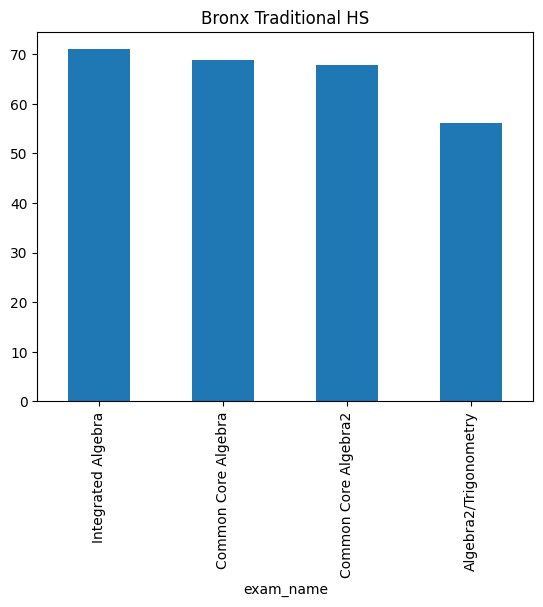

In [ ]:
traditional_algebra_score.plot(kind='bar',x='exam_name',y='exam_score',title="Bronx Traditional HS",
                              legend=False)

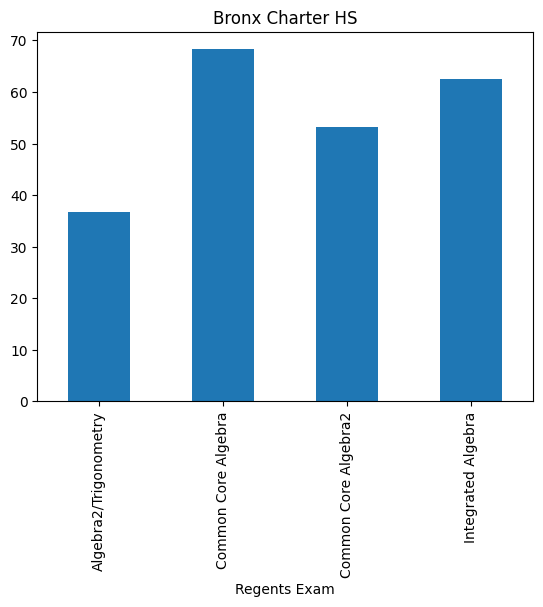

In [ ]:
charter_algebra_score=charter_hs[charter_hs["Regents Exam"].str.contains('Algebra')].groupby("Regents Exam")['charter_numeric_score'].mean().plot(kind="bar",title="Bronx Charter HS")

In [ ]:
import seaborn as sn

([0, 1, 2, 3],
 [Text(0, 0, 'Integrated Algebra'),
  Text(1, 0, 'Common Core Algebra'),
  Text(2, 0, 'Common Core Algebra2'),
  Text(3, 0, 'Algebra2/Trigonometry')])

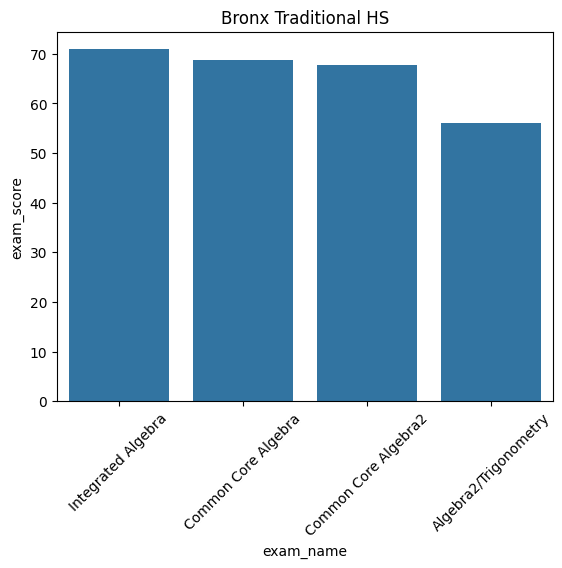

In [ ]:
sn.barplot(data=traditional_algebra_score,x='exam_name',y='exam_score')
plt.title('Bronx Traditional HS')
plt.xticks(rotation=45)


In [2]:
## I concluded from my analyist the Bronx traditional high school scores in algebra is higher than the carter high school